# Explore Data

In [0]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Load Data

In [0]:
import pandas as pd
# File location and type
file_location = "/FileStore/tables/bbc_news_data_embedding.csv"
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = "\t"

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format('com.databricks.spark.csv') \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

temp_table_name = "bbc_news_data_embedding_csv"

df.createOrReplaceTempView(temp_table_name)
df.write.mode("overwrite").option("overwriteSchema", "true").saveAsTable("openai.bbc_news_data")
df = spark.sql('select * from openai.bbc_news_data')
df_orig = df.toPandas()

In [0]:
df = df_orig.copy()
df

,category,filename,title,content,embedding
0,business,001.txt,Ad sales boost Time Warner profit,""" Quarterly profits at US media giant TimeWarn...","[-0.0012276918860152364, 0.00733763724565506, ..."
1,business,002.txt,Dollar gains on Greenspan speech,""" The dollar has hit its highest level against...","[0.0009311728645116091, 0.014099937863647938, ..."
2,business,003.txt,Yukos unit buyer faces loan claim,""" The owners of embattled Russian oil giant Yu...","[-0.010487922467291355, 0.009665092453360558, ..."
3,business,004.txt,High fuel prices hit BA's profits,""" British Airways has blamed high fuel prices ...","[0.0111119095236063, 0.004624682944267988, -0...."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.0021637482568621635, 0.005410161800682545,..."
...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,""" BT is introducing two initiatives to help be...","[0.007671569474041462, 0.00624304823577404, -0..."
2221,tech,398.txt,Spam e-mails tempt net shoppers,""" Computer users across the world continue to ...","[0.0026338498573750257, 0.015989987179636955, ..."
2222,tech,399.txt,Be careful how you code,""" A new European directive could put software ...","[0.007126151118427515, 0.008495588786900043, -..."
2223,tech,400.txt,US cyber security chief resigns,""" The man making sure US computer networks are...","[0.002447678940370679, 0.006076449993997812, -..."


In [0]:
df.describe()

,category,filename,title,content,embedding
count,2225,2225,2225,2225,2217
unique,5,511,2096,2092,2107
top,sport,001.txt,Microsoft seeking spyware trojan,""" Microsoft has warned PC users to update thei...","[0.00024480404681526124, -0.002897972008213401..."
freq,511,5,2,2,2


In [0]:
for col in ['category', 'filename']:
    print(df[col].unique())

['business' 'entertainment' 'politics' 'sport' 'tech']
['001.txt' '002.txt' '003.txt' '004.txt' '005.txt' '006.txt' '007.txt'
 '008.txt' '009.txt' '010.txt' '011.txt' '012.txt' '013.txt' '014.txt'
 '015.txt' '016.txt' '017.txt' '018.txt' '019.txt' '020.txt' '021.txt'
 '022.txt' '023.txt' '024.txt' '025.txt' '026.txt' '027.txt' '028.txt'
 '029.txt' '030.txt' '031.txt' '032.txt' '033.txt' '034.txt' '035.txt'
 '036.txt' '037.txt' '038.txt' '039.txt' '040.txt' '041.txt' '042.txt'
 '043.txt' '044.txt' '045.txt' '046.txt' '047.txt' '048.txt' '049.txt'
 '050.txt' '051.txt' '052.txt' '053.txt' '054.txt' '055.txt' '056.txt'
 '057.txt' '058.txt' '059.txt' '060.txt' '061.txt' '062.txt' '063.txt'
 '064.txt' '065.txt' '066.txt' '067.txt' '068.txt' '069.txt' '070.txt'
 '071.txt' '072.txt' '073.txt' '074.txt' '075.txt' '076.txt' '077.txt'
 '078.txt' '079.txt' '080.txt' '081.txt' '082.txt' '083.txt' '084.txt'
 '085.txt' '086.txt' '087.txt' '088.txt' '089.txt' '090.txt' '091.txt'
 '092.txt' '093.txt' '

In [0]:
df[['category', 'filename']]

,category,filename
0,business,001.txt
1,business,002.txt
2,business,003.txt
3,business,004.txt
4,business,005.txt
...,...,...
2220,tech,397.txt
2221,tech,398.txt
2222,tech,399.txt
2223,tech,400.txt


## Categories

<AxesSubplot:title={'center':'Number of articles per category'}, xlabel='Category', ylabel='Articles Count'>

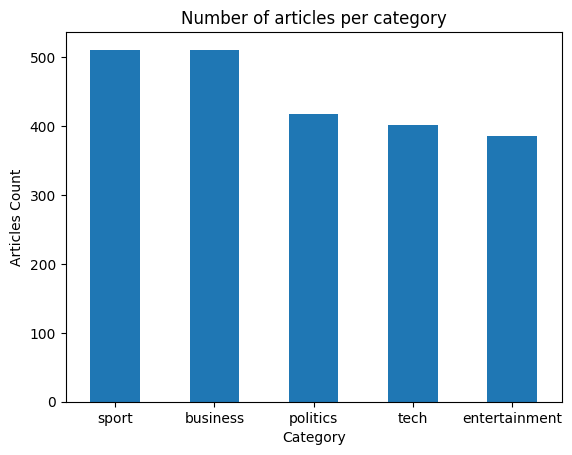

In [0]:
#create bar plot to visualize frequency of each team
df['category'].value_counts().plot(kind='bar', xlabel='Category', ylabel='Articles Count', rot=0, title='Number of articles per category')

## Text Length

In [0]:
df["word_count"] = df["content"].apply(lambda n: len(n.split()))
df

,category,filename,title,content,embedding,word_count
0,business,001.txt,Ad sales boost Time Warner profit,""" Quarterly profits at US media giant TimeWarn...","[-0.0012276918860152364, 0.00733763724565506, ...",417
1,business,002.txt,Dollar gains on Greenspan speech,""" The dollar has hit its highest level against...","[0.0009311728645116091, 0.014099937863647938, ...",381
2,business,003.txt,Yukos unit buyer faces loan claim,""" The owners of embattled Russian oil giant Yu...","[-0.010487922467291355, 0.009665092453360558, ...",260
3,business,004.txt,High fuel prices hit BA's profits,""" British Airways has blamed high fuel prices ...","[0.0111119095236063, 0.004624682944267988, -0....",402
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[-0.0021637482568621635, 0.005410161800682545,...",260
...,...,...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,""" BT is introducing two initiatives to help be...","[0.007671569474041462, 0.00624304823577404, -0...",416
2221,tech,398.txt,Spam e-mails tempt net shoppers,""" Computer users across the world continue to ...","[0.0026338498573750257, 0.015989987179636955, ...",354
2222,tech,399.txt,Be careful how you code,""" A new European directive could put software ...","[0.007126151118427515, 0.008495588786900043, -...",1047
2223,tech,400.txt,US cyber security chief resigns,""" The man making sure US computer networks are...","[0.002447678940370679, 0.006076449993997812, -...",376


### plot `word_count` per `category`

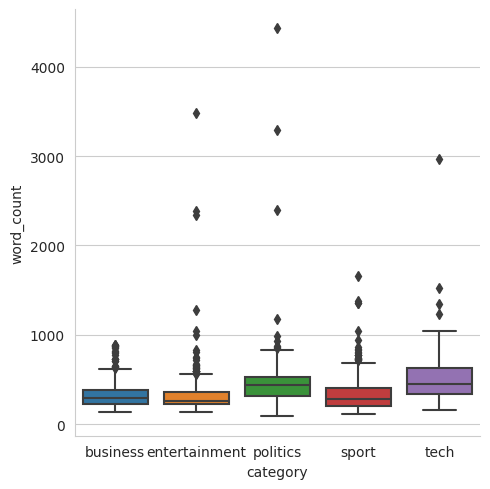

In [0]:
import seaborn as sns

sns.set_style("whitegrid")
sns.catplot(data=df, x="category", y="word_count", kind="box", height=5)

## Save data

In [0]:
#df.to_csv("../data/bbc-news-data-00.csv", sep='\t')